# $k$-means vs GMM

The objective of this lab is to compare the performance of two clustering algorithms, $k$-means and the EM algorithm for the Gaussian Mixture Model (GMM), on both synthetic and real data.

You will find below Python code for loading data samples either from the Gaussian Mixture Model (GMM) or from the [iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher) and for clustering these data samples by $k$-means and EM on the GMM.

## To do

1. Compare the performance of $k$-means and Gaussian mixture. Test various parameters for the GMM, and different values of $k$.
2. Implement a version of Gaussian mixture where the covariance matrices are diagonal (and thus stored as *vectors*) and test its performance. We refer to this algorithm as GMD (Gaussian Mixture with Diagonal covariance matrices)
3. Test these three algorithms ($k$-means, GMM and GMD) on data of your choice.

## Import packages

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, metrics

## Synthetic data

In [4]:
def gaussian_samples(mean = 0, std_dev = 1, nb_samples = 1):
    '''Gaussian samples
    
    Parameters
    ----------
    mean: float or array of floats, default: 0
        Mean            
    std_dev: float or array of floats, default: 1
        Standard deviation (covariance = SS^T)
    nb_samples: int
        Number of samples
        
    Returns
    -------
    samples: array of floats of shape (nb_samples,dim)
        Gaussian samples (std_dev * normal_samples + mean)
    '''
        
    mean = np.array(mean)
    std_dev = np.array(std_dev)
    try:
        dim = mean.shape[0]
    except:
        dim = 1
    normal_samples = np.random.normal(size = dim * nb_samples).reshape(dim,nb_samples)
    samples = np.array(std_dev).dot(normal_samples) 
    samples += np.array(mean).reshape(dim,1).dot(np.ones((1,nb_samples)))
    return samples.T

In [5]:
def gmm_samples(means = [0], std_devs = [1], p = None, nb_samples = 1):
    '''Gaussian mixture model samples
    
    Parameters
    ----------
    means: array of floats of shape (nb_modes,dim)
        Means            
    std_dev: array of floats of shape (nb_modes,dim,dim)
        Standard deviations
    p: array of floats of shape (nb_modes)
        Mixing distribution (sums to 1)
    nb_samples: int
        Number of samples
        
    Returns
    -------
    samples: array of floats of shape (nb_samples,dim)
        Gaussian mixture model samples 
    labels: array of integers of shape (nb_samples)
        labels (latent variables)
    '''
    means = np.array(means)
    std_devs = np.array(std_devs)
    nb_labels = means.shape[0]
    try:
        dim = means.shape[1]
    except:
        dim = 1
    labels = np.random.choice(nb_labels, size = nb_samples, p = p)
    samples = np.zeros((nb_samples,dim))
    for j in range(nb_labels):
        nb_samples_j = np.sum(labels == j)
        if nb_samples_j:
            index = np.where(labels == j)[0]
            samples[index] = gaussian_samples(means[j], std_devs[j], nb_samples_j)
    return samples, labels

In [6]:
def show_samples(samples, labels, features = [0,1], feature_names = None, display_labels = True):
    '''Display the samples in 2D'''
    if display_labels:
        nb_labels = np.max(labels)
        for j in range(nb_labels + 1):
            nb_samples = np.sum(labels == j)
            if nb_samples:
                index = np.where(labels == j)[0]
                plt.scatter(samples[index,features[0]],samples[index,features[1]])
    else:
        plt.scatter(samples[:,features[0]],samples[:,features[1]],color='gray')
    if feature_names is not None:
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
    plt.axis('equal')
    plt.show()

In [7]:
means = [[3,2],[-3,2],[0,-4]]
std_devs = [[[1,0],[0,1]],[[1,0],[0,1]],[[2,0],[0,2]]]
p = [0.25,0.25,0.5]

In [8]:
samples, labels = gmm_samples(means, std_devs, p, 300)

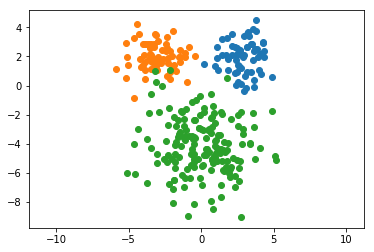

In [9]:
show_samples(samples, labels)

## Real data

In [112]:
iris = datasets.load_iris()
samples = iris.data  
features_names = iris.feature_names
labels = iris.target

In [113]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [114]:
samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [115]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [116]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [117]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

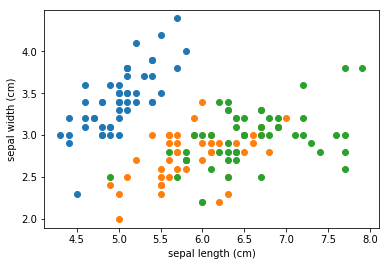

In [118]:
features = [0,1]
names = [feature_names[i] for i in features]
show_samples(samples, true_labels, features, names)

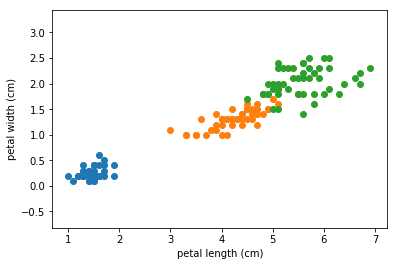

In [119]:
features = [2,3]
names = [feature_names[i] for i in features]
show_samples(samples, true_labels, features, names)

## Metrics

In [120]:
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import adjusted_mutual_info_score as ami

## k-means

In [121]:
class KMeans:
    '''k-means algorithm
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of k-means, each with different initial centers. 
        The output is that of the best instance (in terms of likelihood).
    
    n_iter: int, default: 300
        Number of iterations for each instance of k-means.
        
    algorithm: "random" or "++", default:"++"
        Algorithm for initializing the centers; "++" corresponds to k-means++.
    
    seed: int, default: None
        Seed for the random generation of initial centers.
        
    verbose: boolean, optional
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).
        
    centers_ : array, shape(n_clusters, n_features)
        Cluster centers.
        
    inertias_: array, shape(n_clusters,)
        Cluster inertias (sum of square distances).
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='++', seed=None, verbose = False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.centers_ = None
        self.inertias_ = None
       
    def fit(self, X):
        '''Cluster data X using k-means
    
        Parameters
        ----------
        X: array, shape(n_samples,n_features)
            Data to cluster.
        '''        
        
        def init_centers(self, X):
            if self.algorithm == 'random':
                # random centers 
                samples = np.random.choice(X.shape[0], size = self.n_clusters)
                centers = X[samples]
            else:
                # k-means++
                centers = []
                centers.append(X[np.random.randint(X.shape[0])])
                distance = np.full(X.shape[0], np.inf)
                for j in range(1,self.n_clusters):
                    distance = np.minimum(np.linalg.norm(X - centers[-1], axis=1), distance) #return a list of same dimension with X with min between 2 elements
                    p = np.square(distance) / np.sum(np.square(distance)) #the further, the p is bigger. p.shape[0]=X.shape[0]
                    sample = np.random.choice(X.shape[0], p = p)
                    centers.append(X[sample]) #append a center selected with p probability
            return centers
        
        def compute_centers(self, X, labels):
            centers = []
            for j in range(self.n_clusters):
                index = np.where(labels == j)[0]
                if len(index):
                    centers.append(np.mean(X[index],axis = 0))
                else:
                    # reinit center in case of empty cluster
                    centers.append(X[np.random.choice(X.shape[0])])
            return np.array(centers)

        def compute_distances(self, X, centers):
            distances = []
            for j in range(self.n_clusters):
                distances.append(np.linalg.norm(X - centers[j], axis=1))
            return np.array(distances)
            
        def compute_inertias(self, X, labels, centers):
            inertias = []
            for j in range(self.n_clusters):
                index = np.where(labels == j)[0]
                inertias.append(np.sum(np.square(np.linalg.norm(X[index] - centers[j], axis=1))))
            return np.array(inertias)
    
        def one_kmeans(self, X):
            centers = init_centers(self, X)
            for i in range(self.n_iter):
                centers_old = centers.copy()
                distances = compute_distances(self, X, centers) #return a matrix of len(X) * n_cluster dimension
                labels = np.argmin(distances, axis=0) #return a list of len(X) * 1, the argmin gives the index of the min distance 
                centers = compute_centers(self, X, labels) #return a list of len(n_cluster)
                if np.array_equal(centers, centers_old):
                    break
            inertias = compute_inertias(self, X, centers, labels)
            return labels, centers, inertias
            
        np.random.seed(self.seed)
        best_inertia = None
        # select the best instance of k-means
        for i in range(self.n_init):
            if self.verbose:
                print("Instance ",i)
            labels, centers, inertias = one_kmeans(self, X)
            inertia = np.sum(inertias)
            if best_inertia is None or inertia < best_inertia:
                best_labels = labels.copy()
                best_centers = centers.copy()
                best_inertias = inertias.copy()
                best_inertia = inertia

        self.labels_ = best_labels
        self.centers_ = best_centers
        self.inertias_ = best_inertias
        return self

In [122]:
km = KMeans(n_clusters = 3)

In [123]:
km.fit(samples)

In [132]:
ari(labels, km.labels_) 

0.7302382722834697

## Gaussian mixture

In [147]:
class GMM:
    '''EM algorithm for the Gaussian mixture model
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of the algorithm, each with different initial cluster centers. 
        The output is that of the best instance (in terms of likelihood).
    
    n_iter: int, default: 300
        Maximum number of iterations for each instance of the algorithm.
        
    algorithm: "random" or "k-means++", default:"k-means++"
        Algorithm for initializing the means.
    
    seed: int, default: None
        Seed for the random generation of cluster centers.
        
    verbose: boolean, default: True
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).

    label_probs_: array, shape(n_samples,n_clusters)
        Probability distribution of labels for each sample.
        
    centers_ : array, shape(n_clusters,n_features)
        Cluster centers.
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='k-means++', seed=None, verbose=True):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.label_probs_ = None
        self.centers_ = None
       
    def fit(self, X):
        '''Cluster data X using EM for the Gaussian mixture model
    
        Parameters
        ----------
        X: array, shape(n_samples,n_features)
            Data to cluster.
        '''        
        
        def init_parameters(self, X):
            # choose initial centers
            if self.algorithm == 'random':
                # random centers
                samples = np.random.choice(X.shape[0], size = self.n_clusters)
                centers = X[samples]
            else:
                # k-means++
                centers = []
                centers.append(X[np.random.randint(X.shape[0])])
                distance = np.full(X.shape[0], np.inf)
                for j in range(1,self.n_clusters):
                    #print("centers[-1]", centers[-1])
                    #print("np.linalg.norm(X - centers[-1], axis=1)",np.linalg.norm(X - centers[-1], axis=1))
                    #print("X", X)
                    distance = np.minimum(np.linalg.norm(X - centers[-1], axis=1), distance)
                    #print("distance", distance)
                    p = np.square(distance) / np.sum(np.square(distance))
                    print("X.shape, p", X.shape, len(p))
                    sample = np.random.choice(X.shape[0], p = p)
                    centers.append(X[sample])
                    print("centers", centers)
                
            # estimate the parameters from the induced clusters
            distances = []
            for j in range(self.n_clusters):
                distances.append(np.linalg.norm(X - centers[j], axis=1)) #distance from each center to all points
            labels = np.argmin(np.array(distances), axis=0) 
            print("labels", labels, labels.shape)
            means = []
            covariances = []
            mixing_weights = []
            for j in range(self.n_clusters):
                index = np.where(labels == j)[0]
                mixing_weights.append(len(index))
                if len(index):
                    means.append(np.mean(X[index], axis = 0))
                    covariances.append(np.cov(X[index].T))    
                else:
                    means.append(centers[j])
                    covariances.append(np.eye(X.shape[1]))
            return np.array(means), np.array(covariances), np.array(mixing_weights)

        def compute_label_probs(self, X, means, covariances, mixing_weights):
            label_probs = np.zeros((X.shape[0],self.n_clusters))
            for j in range(self.n_clusters):
                cov = covariances[j]
                try:
                    inv_cov = np.linalg.inv(cov)
                    square_distances = ((X - means[j]).dot(inv_cov) * (X - means[j])).sum(axis = 1) 
                    label_probs[:,j] = np.exp(-square_distances / 2) / np.sqrt(np.linalg.det(cov))
                except:
                    if self.verbose:
                        print("Warning: Singular covariance matrix")
                    square_distances = np.square(X - means[j]).sum(axis = 1) 
                    label_probs[:,j] = np.exp(-square_distances / 2) 
            label_probs = label_probs * mixing_weights
            label_probs = (label_probs.T / label_probs.sum(axis = 1)).T
            return label_probs    
                        
        def compute_parameters(self, X, label_probs):
            mixing_weights = label_probs.sum(axis = 0)
            means = (X.T.dot(label_probs) / mixing_weights).T
            covariances = []
            for j in range(self.n_clusters):
                Y = (X - means[j]).T * label_probs[:,j]
                covariances.append(Y.dot(X - means[j]) / mixing_weights[j])
            return means, covariances, mixing_weights
        
        def compute_log_likelihood(self, X, means, covariances, mixing_weights):
            likelihoods = np.zeros((X.shape[0],self.n_clusters))
            total_weight = mixing_weights.sum()
            for j in range(self.n_clusters):
                cov = covariances[j]
                try:
                    inv_cov = np.linalg.inv(cov)
                    square_distances = ((X - means[j]).dot(inv_cov) * (X - means[j])).sum(axis = 1) 
                    likelihoods[:,j] = mixing_weights[j] / total_weight * np.exp(-square_distances / 2) / np.sqrt(np.linalg.det(cov))
                except:
                    if self.verbose:
                        print("Warning: Singular covariance matrix")
                    square_distances = np.square(X - means[j]).sum(axis = 1) 
                    likelihoods[:,j] = mixing_weights[j] / total_weight * np.exp(-square_distances / 2) 
            return np.log(likelihoods.sum(axis = 1)).sum()
    
        def single_run_EM(self, X):
            means, covariances, mixing_weights = init_parameters(self, X)
            labels = -np.ones(X.shape[0])
            for i in range(self.n_iter):    
                # Expectation
                label_probs = compute_label_probs(self, X, means, covariances, mixing_weights)              
                if np.array_equal(labels, label_probs.argmax(axis = 1)):
                    break
                else:
                # Maximization
                    means, covariances, mixing_weights = compute_parameters(self, X, label_probs)
                    labels = label_probs.argmax(axis = 1)
            return label_probs, means, covariances, mixing_weights
            
        np.random.seed(self.seed)
        best_loglikelihood = None
        # select the best instance of EM
        for i in range(self.n_init):
            if self.verbose:
                print("Instance ",i)               
            label_probs, means, covariances, mixing_weights = single_run_EM(self, X)
            loglikelihood = compute_log_likelihood(self, X, means, covariances, mixing_weights)
            if best_loglikelihood is None or loglikelihood > best_loglikelihood:
                best_loglikelihood = loglikelihood
                best_label_probs = label_probs
                best_labels = label_probs.argmax(axis = 1)
                best_centers = means
        self.label_probs_ = best_label_probs
        self.labels_ = best_labels
        self.centers_ = best_centers
        return self

In [148]:
gmm = GMM(n_clusters = 3)

In [149]:
gmm.fit(samples)

Instance  0
X.shape, p (150, 4) 150
centers [array([6. , 2.2, 4. , 1. ]), array([6.7, 3.1, 5.6, 2.4])]
X.shape, p (150, 4) 150
centers [array([6. , 2.2, 4. , 1. ]), array([6.7, 3.1, 5.6, 2.4]), array([5.5, 4.2, 1.4, 0.2])]
labels [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1] (150,)
Instance  1
X.shape, p (150, 4) 150
centers [array([5.1, 3.3, 1.7, 0.5]), array([6.7, 2.5, 5.8, 1.8])]
X.shape, p (150, 4) 150
centers [array([5.1, 3.3, 1.7, 0.5]), array([6.7, 2.5, 5.8, 1.8]), array([5.7, 3. , 4.2, 1.2])]
labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1

In [127]:
samples.shape

(150, 4)

In [131]:
ari(labels, gmm.labels_) 

0.9038742317748124

## Gaussian mixture with diagonal covariance matrices

In [137]:
class GMD:
    '''EM algorithm for the Gaussian mixture model with diagonal covariance matrices
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of the algorithm, each with different initial cluster centers. 
        The output is that of the best instance (in terms of likelihood).
    
    n_iter: int, default: 300
        Maximum number of iterations for each instance of the algorithm.
        
    algorithm: "random" or "k-means++", default:"k-means++"
        Algorithm for initializing the means.
    
    seed: int, default: None
        Seed for the random generation of cluster centers.
        
    verbose: boolean, default: True
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).

    label_probs_: array, shape(n_samples,n_clusters)
        Probability distribution of labels for each sample.
        
    centers_ : array, shape(n_clusters,n_features)
        Cluster centers.
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='k-means++', seed=None, verbose=True):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.label_probs_ = None
        self.centers_ = None
       
    def fit(self, X):
        '''Cluster data X using EM for the Gaussian mixture model with diagonal covariance matrices
    
        Parameters
        ----------
        X: array, shape(n_samples,n_features)
            Data to cluster.
        '''        
        
        # to be completed
        return self

In [138]:
gmd = GMD(n_clusters = 3)

In [139]:
gmd.fit(samples)